In [22]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
import math
from multiprocessing import Pool

from utils import *

%matplotlib inline

In [23]:
# Daniel M Abrams et al. Solvable Model for Chimera States of Coupled Oscillators. PRL, 2008.
# stable Chimera for the parameters Nc=2, Nn=32, Nie=Nn*Nn with rando=False, rel=0.24, beta=0.1
Nc=2
Nn=10
Nie=3#Nn*Nn
G=Modules_full(Nc,Nn,Nie,rando=False)
# G=Modules_full(2, 10, 3)

rel=0.24
nu=(1-rel)/2
mu=1-nu
beta = 0.1
alpha = np.pi/2 - beta
# for unweighted edges with compute_eig_projection_weighted, otherwise just use compute_eig_projection
mu=1
nu=1

a = 1

B, Bplus, W_e, v, w=compute_eig_projection_weighted(G, mu, nu, Nn)
# B, Bplus, v, w=compute_eig_projection(G) #for unweighted graph

# W_e=np.diag(np.ones(W_e.shape[0]))
# print W_e

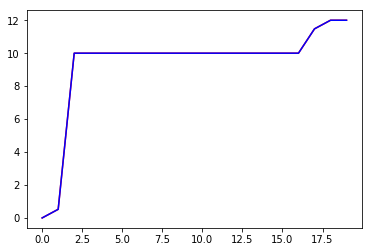

In [24]:
## check that w is the same as Delta_2_weighted
plt.figure()
plt.plot(w,'r')
Bv = np.array(B.dot(v)) #edges by modes
Bplusv = np.array(Bplus.dot(v)) #edges by modes
plt.plot(np.diag((np.diag(W_e)[:,np.newaxis,np.newaxis]*(Bplusv[:, :, np.newaxis]*Bv[:, np.newaxis,: ])).sum(0)),'b')

In [25]:
# initial conditions for the stable Chimera (for two modules)
# theta_0 = np.concatenate((np.pi*np.ones(len(G)/2),np.pi+np.random.normal(0, 1, len(G)/2)),axis = 0)
# other intial conditions that don't work for Chimera
# theta_0 = np.pi+np.random.normal(0, 1, len(G))
# theta_0 = np.random.uniform(0, 1.5, len(G))
theta_0 = np.pi*np.ones(len(G))
omega_0 = np.zeros(len(G))
t_max = 2000
n_t = 500

sol_full = integrate_kuramoto_full_theta_weighted(B, Bplus, theta_0, t_max, n_t, alpha, a, omega_0, W_e)
sol_full.y = np.mod(sol_full.y,2*np.pi)

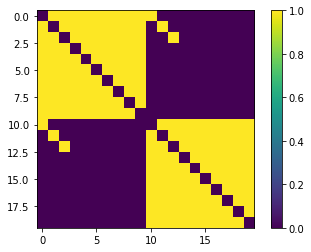

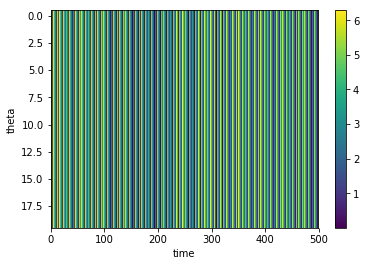

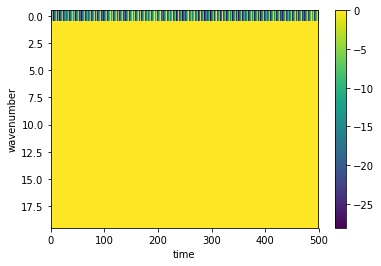

In [26]:
# adjacency matrix of the graph
plt.figure()
plt.imshow(-Bplus.T.dot(W_e.dot(B))+np.diag(np.diag(Bplus.T.dot(W_e.dot(B)))))
plt.colorbar()

# angles
plt.figure()
plt.imshow(sol_full.y,aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('theta')

# modes
sol_full_gamma=v.T.dot(sol_full.y)
plt.figure()
plt.imshow(sol_full_gamma,aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('wavenumber')

2.655009984134468e-32 0.0


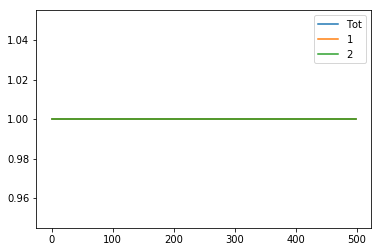

In [27]:
op=order_parameter(sol_full.y, Nc, Nn)
lt, chit = Shanahan_indices(op)
plt.figure()
plt.plot(op[0,:], label= r'Tot')
for i in range(op.shape[0]-1):
    plt.plot(op[i+1,:], label= str(i+1))
plt.legend()
print lt,chit

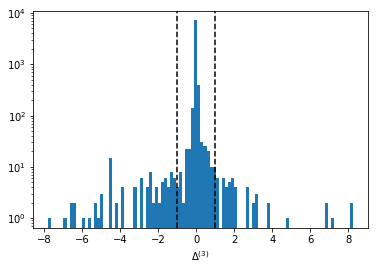

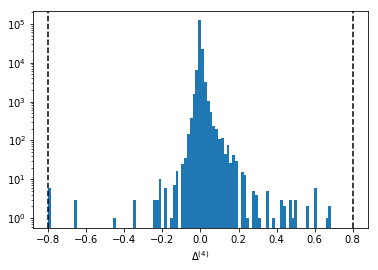

In [28]:
## Now let's check the the approximation

Bv = np.array(B.dot(v)) #edges by modes
Bplusv = np.array(Bplus.dot(v)) #edges by modes

w_0 = w.copy()
w_0[0]=1 #??

D3 = Delta_3_weighted(Bv, Bplusv, W_e)/w_0[:,np.newaxis,np.newaxis]

th_3 = 1.0
th_4 = 0.8

plt.figure()
plt.hist(D3.flatten(),bins=100,log=True)
plt.axvline(-th_3,ls='--',c='k')
plt.axvline(th_3,ls='--',c='k')
plt.xlabel(r'$\Delta^{(3)}$')

D4 = Delta_4_weighted(Bv, Bplusv, W_e)/w_0[:,np.newaxis,np.newaxis,np.newaxis]

plt.figure()
plt.hist(D4.flatten(),bins=100,log=True)
plt.axvline(-th_4,ls='--',c='k')
plt.axvline(th_4,ls='--',c='k')
plt.xlabel(r'$\Delta^{(4)}$')

In [21]:
gamma_0 = theta_0.dot(v).copy() #start with the same initial conditions as in the full model

sol_approx = integrate_kuramoto_approx_weighted(B, Bplus, v, w, gamma_0, t_max, n_t, alpha, a, omega_0, th_3, th_4, W_e)[0]

# utils.py:309: RuntimeWarning: overflow encountered in double_scalars
#   f[i[0]] += 1./6.*D_4_weighted[i[0],i[1],i[2],i[3]]*gamma[i[1]]*gamma[i[2]]*gamma[i[3]]
# so probablty problem in Delta_4_weighted
# runs even including "lots" of elements of D3, but stalls when D4 has more than 6 elements

('Using ', 144, 'elements of Delta_3')
('Using ', 6, 'elements of Delta_4')


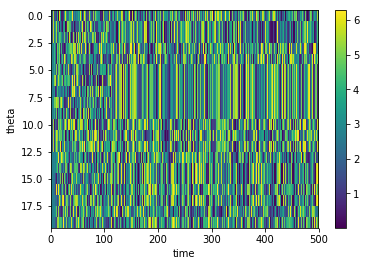

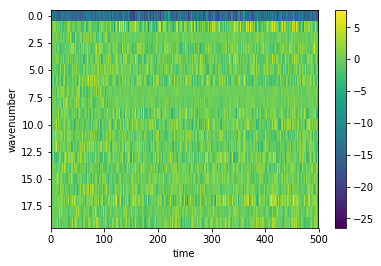

In [9]:
sol_theta=np.mod(v.dot(sol_approx.y),2*np.pi)

plt.figure()
plt.imshow(sol_theta,aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('theta')

plt.figure()
plt.imshow(v.T.dot(sol_theta),aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('wavenumber')

# plt.figure()
# plt.imshow(sol_approx.y,aspect='auto')
# plt.colorbar()
# plt.xlabel('time')
# plt.ylabel('wavenumber')

# plt.figure()
# plt.imshow(v.dot(sol_approx.y),aspect='auto')
# plt.colorbar()
# plt.xlabel('time')
# plt.ylabel('theta')